INFO: Elasticity coefficient: 0.2


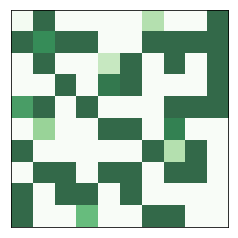

In [1]:
%matplotlib inline
from quake import Earthquake
from Cell2D import Cell2DViewer

from matplotlib import rc
rc('animation', html='html5')

steve = Earthquake(10, fth=2)
viewer = Cell2DViewer(steve)
anim = viewer.animate(frames=100,interval=100)

In [2]:
anim

In [1]:
%matplotlib inline
from plot_quake import * 
from quake import Earthquake
import matplotlib
from thinkplot import *

In [ ]:
matplotlib.rc('figure', figsize=(8,6))
matplotlib.rc('font', size=18)
calculate_power_law(iters=1000000,plot=True, n=35, fth=3, k1=1, kl=(1/.1 - 4), del_bottom=True, plot_options={'color': 'b','alpha':1})

calculate_power_law(iters=1000000,plot=True, n=35, fth=3, k1=1, kl=(1/.1 - 4), del_bottom=False, plot_options={'color': 'r','alpha':1})
# calculate_power_law(iters=1000,plot=True, n=35, fth=3, k1=1, kl=(1/.15 - 4), plot_options={'color': 'r','alpha':1})
# calculate_power_law(iters=1000,plot=True, n=35, fth=3, plot_options={'color': 'k','alpha':1})
# calculate_power_law(iters=1000,plot=True, n=35, fth=3, k1=1, kl=(1/.25 - 4), plot_options={'color': 'y', 'alpha':1})
# Save('fig3', formats=['eps'])



INFO: Elasticity coefficient: 0.1
INFO: B = -0.320413042757
INFO: Elasticity coefficient: 0.1


In [ ]:
plot_power_law(n=35, iters=1000, fth=3)

INFO: Elasticity coefficient: 0.05
INFO: B = -0.0533839389815
INFO: Elasticity coefficient: 0.0605263157895
INFO: B = -0.049934872087
INFO: Elasticity coefficient: 0.0710526315789
INFO: B = -0.0638038802324
INFO: Elasticity coefficient: 0.0815789473684
INFO: B = -0.0674256588577
INFO: Elasticity coefficient: 0.0921052631579
INFO: B = -0.0616576089904
INFO: Elasticity coefficient: 0.102631578947
INFO: B = -0.065817186211
INFO: Elasticity coefficient: 0.113157894737
INFO: B = -0.0718035988298
INFO: Elasticity coefficient: 0.123684210526
INFO: B = -0.0792110475155
INFO: Elasticity coefficient: 0.134210526316
INFO: B = -0.0932723148404
INFO: Elasticity coefficient: 0.144736842105
INFO: B = -0.0988627304969
INFO: Elasticity coefficient: 0.155263157895
INFO: B = -0.112049260601
INFO: Elasticity coefficient: 0.165789473684


INFO: Elasticity coefficient: 0.2


nan

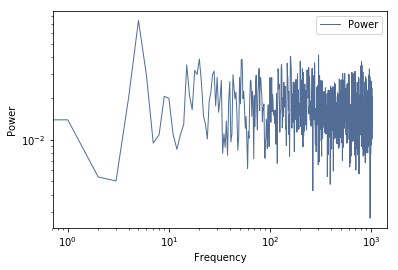

In [3]:
plot_frequency(iters=10000, plot=True, n=35)

[ 10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90  95
 100]
[ 10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90  95
 100] [9, 151, 267, 378, 602, 796, 1081, 1356, 1700, 1990, 2379, 2824, 3256, 3805, 4316, 4942, 5501, 6093, 6844]


2.4080183453201109

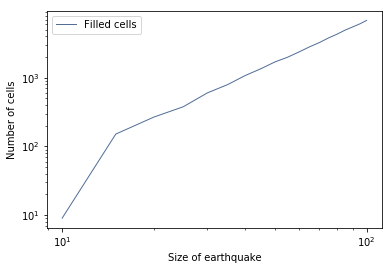

In [3]:
find_fractals(iters=1000,plot=True)